In [1]:
import numpy as np
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
sigma = 10
klen = sigma*5
x = np.arange(-klen,klen+1)[:,np.newaxis]
y = np.arange(-klen,klen+1)[np.newaxis,:]

# k1 = np.exp(-(x**2+y**2)/sigma**2) #diagonal kernel
k1 = np.exp(-(x**2+y**2+x*y)/sigma**2) #kernel with off-diagonal elements

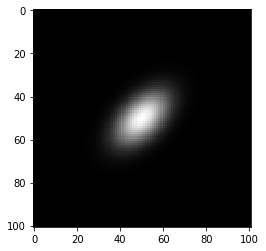

In [3]:
plt.imshow(k1,cmap='gray')

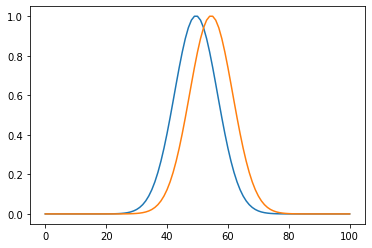

In [4]:
plt.plot(k1[:,klen+1]/ max(k1[:,klen+1]))
plt.plot(k1[:,klen+1-sigma]/ max(k1[:,klen+1-sigma]))

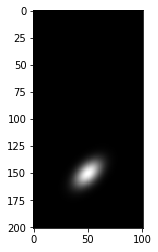

In [5]:
k2part = np.zeros_like(k1)
k2 = np.concatenate((k2part[:-1,:], k1), axis = 0)
plt.imshow(k2,cmap='gray')

In [6]:
k2.shape, k1.shape

((201, 101), (101, 101))

## signal.convolve2d

In [7]:
s = np.random.randint(5, size=(1000,1000))-2
s = s.astype(float)

In [8]:
import time
t0 = time.time()
r = signal.convolve2d(s,k2,'same')
print(time.time()-t0)

43.571354150772095


## Leo's method

In [9]:
t0 = time.time()
mb_y = np.zeros_like(s)
for i in range(s.shape[0]):
    for ii in np.arange(max(i-np.shape(k1)[0]+1,0),i+1):
        mb_y[i,:] += np.convolve(s[ii,:],k1[i-ii, :], 'same')
print(time.time()-t0)

3.3231987953186035


In [10]:
print('error = \n', mb_y - r)
print('sum of error =', np.sum(mb_y - r))
# mb_y - r, np.sum(mb_y - r)

error = 
 [[ 8.07793567e-28  1.61558713e-27  1.61558713e-27 ...  6.61744490e-24
  -1.32348898e-23 -1.32348898e-23]
 [ 4.84676140e-27  2.26182199e-26  1.93870456e-26 ...  0.00000000e+00
   0.00000000e+00  1.32348898e-23]
 [ 1.29246971e-26  0.00000000e+00 -2.58493941e-26 ... -5.29395592e-23
   2.64697796e-23 -2.64697796e-23]
 ...
 [ 4.97379915e-14 -3.19744231e-14  5.32907052e-14 ... -3.01980663e-14
   8.88178420e-15 -1.59872116e-14]
 [ 2.48689958e-14  1.42108547e-14  1.06581410e-14 ...  5.32907052e-15
  -2.48689958e-14  1.95399252e-14]
 [ 2.48689958e-14  1.77635684e-14 -2.48689958e-14 ...  1.77635684e-14
  -3.55271368e-15  4.79616347e-14]]
sum of error = 1.4156750891661806e-10


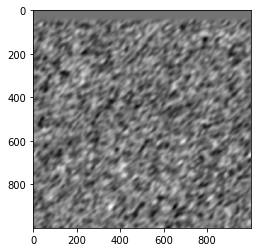

In [11]:
plt.imshow(r,cmap='gray')

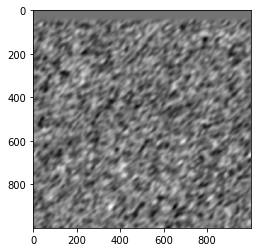

In [12]:
plt.imshow(mb_y,cmap='gray')

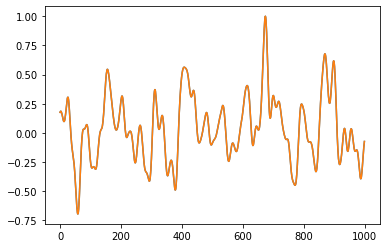

In [13]:
index = 700
# plt.plot(s[index])
plt.plot(r[index]/r[index].max())
plt.plot(mb_y[index]/mb_y[index].max())